# Deber-Practica

1. Comparar el modelo de predicion matematico vs probabilidad.
2. Retroceder un semana y comparar el modelo matematico vs probabilidad vs reales. Solo cargan los datos para generar los modelos menos 7 dias.



# Desarrollo


#### 1. Comparar el modelo de predicion matematico vs probabilidad.

#### MODELO POLINOMIAL


           4           3         2
2.806e-05 x - 0.01701 x + 4.631 x + 185 x - 3223


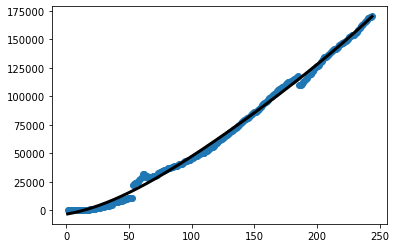

In [1]:
# MODELO POLINOMIAL
%matplotlib inline  
from pylab import *  
import numpy as np
import pandas as pd
import sympy as sp

df = pd.read_csv('covidDatos.csv').fillna(0) # poniendo datos nan a cero
ndf= df.loc[(df['location'] == 'Ecuador') & (df['total_cases'] != 0)] # filtrando por pais y no ceros 
ndf1=ndf[['date','total_cases']]
x=np.arange(1,len(ndf1)+1,1, dtype='float') # arreglo de x lo creo para simular el numero del dia y el numero de casos
y=np.array(ndf1.values[:,1], dtype='float')

fun_pol = np.poly1d(np.polyfit(x, y, 4))
print(fun_pol)
y_pred=fun_pol(x)
plt.scatter(x, y)
plt.plot(x, y_pred, c='black',lw=3)  
plt.show()

#### Modelo Probabilistico

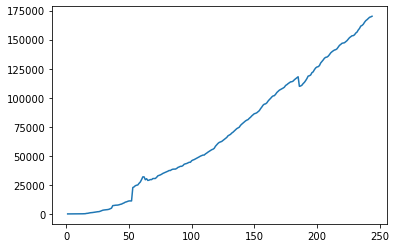

In [2]:
# METODO PROBABILISTICO
xp = x
yp = y

df_p = pd.read_csv('covidDatos.csv').fillna(0) # poniendo datos nan a cero
df1_p= df_p.loc[(df_p['location'] == 'Ecuador') & (df_p['total_cases'] != 0)] # filtrando por pais y no ceros 
df2_p=df1_p[['date','total_cases']]
media = df2_p.values[:,1].mean()
mediana = np.median(df2_p.values[:,1])
# Quiero predecir cuántos "Casos" voy a obtener de aqui a menos 7 dias.
for i in range(int(xp[-1]), int(xp[-1])):
    xp=np.append(xp,(i+1))
    yp=np.append(yp,yp[-1] + mediana)
#valorProbabilistico=y[319]
plt.plot(xp, yp)
plt.show()



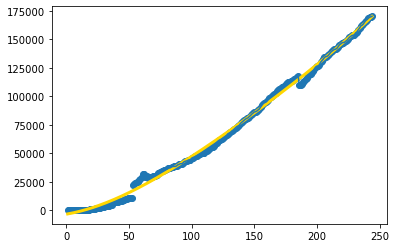

In [3]:
plt.scatter(x, y)
plt.plot(x, y_pred, c='gold',lw=3)
for i in range(int(xp[-1]), int(xp[-1])):
    xp=np.append(xp,(i+1))
    yp=np.append(yp,yp[-1] + mediana)
valorProbabilistico=yp[234]
plt.plot(xp[61:], yp[61:])
plt.show()



#### 2. Retroceder un semana y comparar el modelo matematico vs probabilidad vs reales. Solo cargan los datos para generar los modelos menos 7 dias.

In [5]:
xp_7 = xp
yp_7 = yp

for i in range(int(xp_7[-1]), int(xp_7[-1]-7)):
    xp_7=np.append(xp_7,(i+1))
    yp_7=np.append(yp_7,yp_7[-1] + mediana)
inicio = len(xp_7)-10
fin=len(xp_7)
print("PROBABILISTICO","----","POLINOMIAL")
for i in range(inicio,fin):
    print(y_pred[i],"----",round(yp_7[i],2),)
    dinin=y_pred[i]
    dfi=yp_7[i]
    real=y[i]
print("Datos Hace 7 dias: ",dinin,"----",round(dfi,2),"---",real)

PROBABILISTICO ---- POLINOMIAL
160773.431183264 ---- 161635.0
161774.8476600003 ---- 162178.0
162780.18858962023 ---- 163192.0
163789.51115118264 ---- 164908.0
164802.8731971304 ---- 166302.0
165820.3332532904 ---- 167147.0
166841.95051887375 ---- 168192.0
167867.78486647565 ---- 169194.0
168897.8968420754 ---- 169562.0
169932.34766503636 ---- 170110.0
Datos Hace 7 dias:  169932.34766503636 ---- 170110.0 --- 170110.0


### Analisis
En la modelo probabilistico la prediccion se tiene que una diferencia respecto a los datos de 177 casos en los que el sistema presentaria un erro pero el modelo polinomial predice el valor aproximado en el que se tiene una prediccion valida. Este modelo es mas aplicable dentro de la prediccion del avance de la enfermedad del coronavirus

### Concluciones
El modelo probabilistico puede presentan errores debido a que algunos dato dentro del historico presenta incincidencios o son nulos los cuales hace que la prediccion se vea afecta. Se tiene que el modelo polinomial se aproxima mejor a la prediccion de los casos que se pueden dar. 